### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [2]:
df=pd.read_csv('data.csv')

### EDA

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Dropping irrelevant features

In [4]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 11)

In [7]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

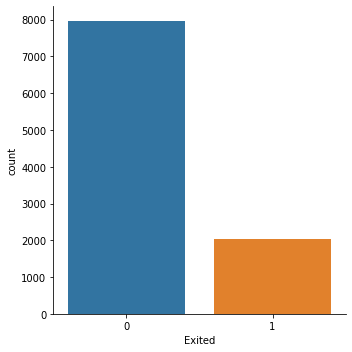

In [11]:
sns.catplot(x='Exited',data=df,kind='count')
# WE can see lot of imbalance in dataset we are going to balance dataset further

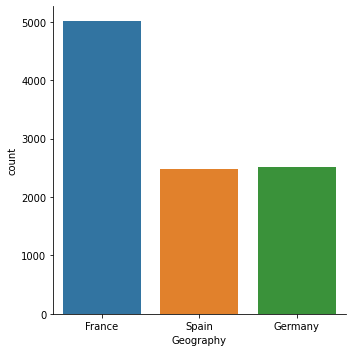

In [12]:
sns.catplot(x='Geography',data=df,kind='count')

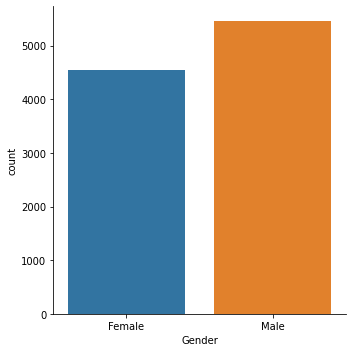

In [13]:
sns.catplot(x='Gender',data=df,kind='count')

<AxesSubplot:ylabel='Frequency'>

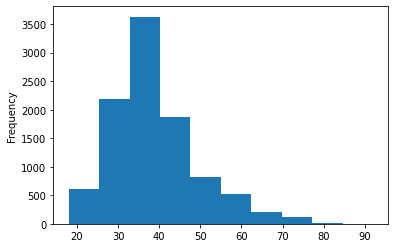

In [14]:
df['Age'].plot(kind='hist')

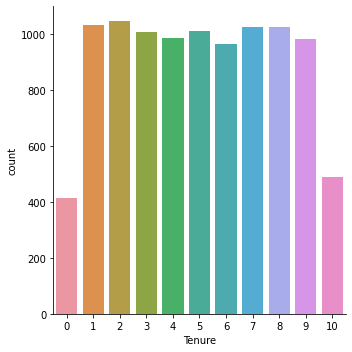

In [15]:
sns.catplot(x='Tenure',data=df,kind='count')

<AxesSubplot:ylabel='Frequency'>

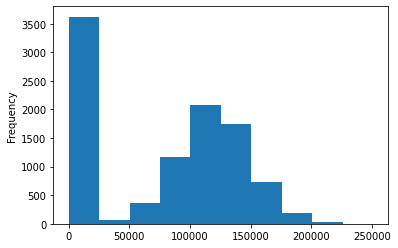

In [16]:
df['Balance'].plot(kind='hist')

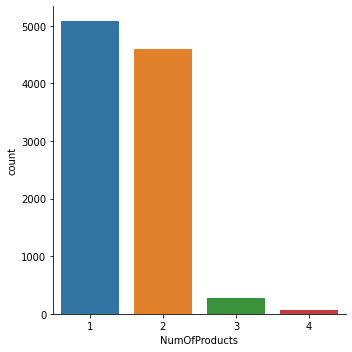

In [17]:
sns.catplot(x='NumOfProducts',data=df,kind='count')

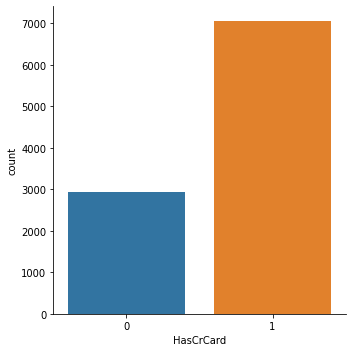

In [18]:
sns.catplot(x='HasCrCard',data=df,kind='count')

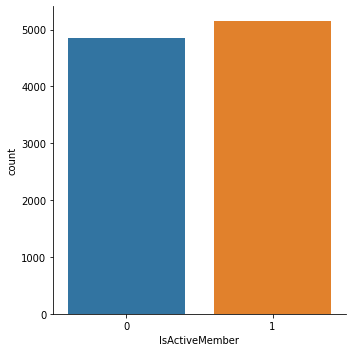

In [19]:
sns.catplot(x='IsActiveMember',data=df,kind='count')

<AxesSubplot:ylabel='Frequency'>

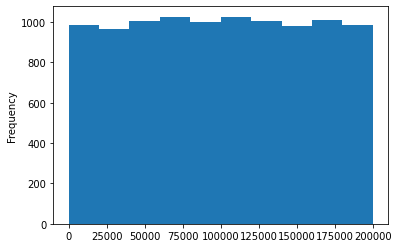

In [20]:
df['EstimatedSalary'].plot(kind='hist')

### Label Encoding for categorical variables

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Geography']=le.fit_transform(df['Geography'])

In [22]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


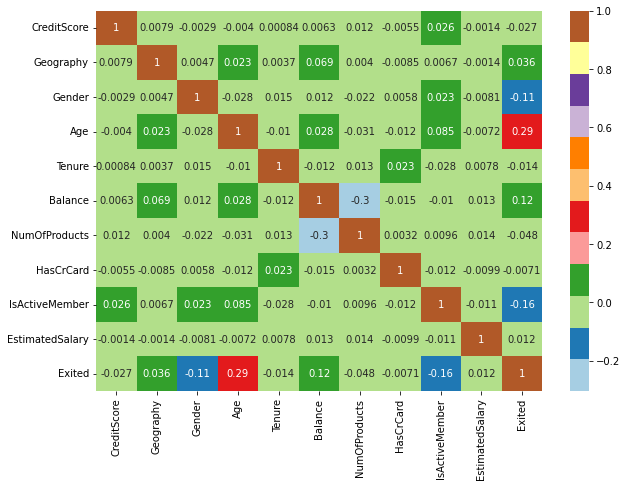

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap="Paired")
plt.show()

In [24]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [25]:
# Balancing dataset
legit=df[df.Exited==0]
fraud=df[df.Exited==1]
legit_sample=legit.sample(n=2037)
df1=pd.concat([legit_sample,fraud],axis=0)

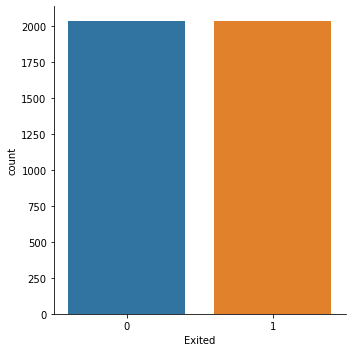

In [26]:
sns.catplot(x='Exited',data=df1,kind='count')
# We can see balanced dataset here

### Separating dependant and independant variables

In [27]:
X=df1.drop('Exited',axis=1)
y=df1.Exited

In [28]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2017,728,2,0,37,4,0.00,1,0,0,4539.38
8877,812,2,0,24,1,92476.88,1,0,0,83247.14
7139,806,0,0,67,1,0.00,2,0,1,103945.58
9609,741,0,0,35,1,0.00,2,1,0,36557.55
8029,671,2,1,50,8,0.00,1,0,1,2560.11
...,...,...,...,...,...,...,...,...,...,...
9981,498,1,1,42,3,152039.70,1,1,1,53445.17
9982,655,1,0,46,7,137145.12,1,1,0,115146.40
9991,597,0,0,53,4,88381.21,1,1,0,69384.71
9997,709,0,0,36,7,0.00,1,0,1,42085.58


In [29]:
y

2017    0
8877    0
7139    0
9609    0
8029    0
       ..
9981    1
9982    1
9991    1
9997    1
9998    1
Name: Exited, Length: 4074, dtype: int64

### Train-test split

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Feature scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_hat=lr.predict(X_test)
from sklearn.metrics import accuracy_score,f1_score
print("Accuracy-score:",accuracy_score(y_test,y_hat))
print("f1-score:",f1_score(y_test,y_hat))

Accuracy-score: 0.6760736196319018
f1-score: 0.6666666666666666


### Support vector machine

In [33]:
from sklearn.svm import SVC
sc=SVC(kernel='rbf')
sc.fit(X_train,y_train)
y_hat1=sc.predict(X_test)
print("Accuracy-score:",accuracy_score(y_test,y_hat1))
print("f1-score:",f1_score(y_test,y_hat1))

Accuracy-score: 0.750920245398773
f1-score: 0.7311258278145696


### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()
rc.fit(X_train,y_train)
y_hat2=rc.predict(X_test)
print("Accuracy-score:",accuracy_score(y_test,y_hat2))
print("f1-score:",f1_score(y_test,y_hat2))

Accuracy-score: 0.7300613496932515
f1-score: 0.7043010752688172


### Decision tree classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(X_train,y_train)
y_hat3=dc.predict(X_test)
print("Accuracy-score:",accuracy_score(y_test,y_hat3))
print("f1-score:",f1_score(y_test,y_hat3))

Accuracy-score: 0.6625766871165644
f1-score: 0.6405228758169933


### K-nearest neighbor

In [36]:
from sklearn.neighbors import KNeighborsClassifier
kc=KNeighborsClassifier(n_neighbors=5)
kc.fit(X_train,y_train)
y_hat4=kc.predict(X_test)
print("Accuracy-score:",accuracy_score(y_test,y_hat4))
print("f1-score:",f1_score(y_test,y_hat4))

Accuracy-score: 0.7190184049079754
f1-score: 0.6909581646423751


#### We are going to use Support Vector Classifier due to high accuracy